In [27]:
import configparser 
#ConfigParser is a Python class which implements a basic configuration language for Python programs.
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import seaborn as sns
import numpy as np
import datetime


import re 
#RegEx : Regular expression

#Import all necessary Libraries
import requests
import pandas as pd
import datetime
import numpy as np
import mplfinance as mpf
import seaborn as sns
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

import matplotlib.pyplot as plt
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import pandas_datareader as web
import datetime as dt


In [28]:


#read configs
config = configparser.ConfigParser()
config.read("config.ini") #The Config.ini file we just created

api_key = config["binance"]["api_key"]
api_secret = config["binance"]["api_secret"]


In [29]:
client = Client(api_key, api_secret)

In [30]:
tickers = client.get_all_tickers()
#This is used to get the entire tickets available on Binance
display (tickers)

[{'symbol': 'ETHBTC', 'price': '0.04861000'},
 {'symbol': 'LTCBTC', 'price': '0.00130100'},
 {'symbol': 'BNBBTC', 'price': '0.00886700'},
 {'symbol': 'NEOBTC', 'price': '0.00030910'},
 {'symbol': 'QTUMETH', 'price': '0.00135500'},
 {'symbol': 'EOSETH', 'price': '0.00026090'},
 {'symbol': 'SNTETH', 'price': '0.00001294'},
 {'symbol': 'BNTETH', 'price': '0.00022860'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00008900'},
 {'symbol': 'BNBETH', 'price': '0.18240000'},
 {'symbol': 'BTCUSDT', 'price': '65071.32000000'},
 {'symbol': 'ETHUSDT', 'price': '3162.88000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000024'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [31]:
depth = client.get_order_book(symbol="ETHBTC")
display(depth)

{'lastUpdateId': 7264306818,
 'bids': [['0.04860000', '24.81190000'],
  ['0.04859000', '29.64240000'],
  ['0.04858000', '43.50860000'],
  ['0.04857000', '24.32100000'],
  ['0.04856000', '41.33090000'],
  ['0.04855000', '27.92640000'],
  ['0.04854000', '13.26920000'],
  ['0.04853000', '10.17460000'],
  ['0.04852000', '31.43130000'],
  ['0.04851000', '8.81340000'],
  ['0.04850000', '28.45800000'],
  ['0.04849000', '15.18570000'],
  ['0.04848000', '35.10630000'],
  ['0.04847000', '4.46690000'],
  ['0.04846000', '45.13570000'],
  ['0.04845000', '6.59900000'],
  ['0.04844000', '13.26550000'],
  ['0.04843000', '34.82990000'],
  ['0.04842000', '67.00880000'],
  ['0.04841000', '6.32900000'],
  ['0.04840000', '9.47120000'],
  ['0.04839000', '4.06400000'],
  ['0.04838000', '8.00500000'],
  ['0.04837000', '4.52280000'],
  ['0.04836000', '60.32440000'],
  ['0.04835000', '6.19040000'],
  ['0.04834000', '5.03660000'],
  ['0.04833000', '158.22150000'],
  ['0.04832000', '4.57730000'],
  ['0.04831000',

In [32]:
depth_df = pd.DataFrame(depth['bids'])
depth_df.columns = ["Price","Volume"]
depth_df.head()

,Price,Volume
0,0.04860000,24.81190000
1,0.04859000,29.64240000
2,0.04858000,43.50860000
3,0.04857000,24.32100000
4,0.04856000,41.33090000


In [33]:
Historical_df = client.get_historical_klines("ETHBTC", Client.KLINE_INTERVAL_1DAY, "1 Jan 2018")

In [34]:
#The historical klines function allows you to retrieve Spot and Future OHLCV data from Binance
Hist_df = pd.DataFrame(Historical_df)

In [35]:
Hist_df.columns = ["Open time","Open","High","Low","Close","Volume","Close time","Quote asset volume","Number of trades","Taker buy base asset volume","Taker buy quote asset volume","Ignore"]

In [36]:
Hist_df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1514764800000,0.05358600,0.05720000,0.05340100,0.05636700,312440.75700000,1514851199999,17404.15888156,406017,150566.08800000,8389.50328492,0
1,1514851200000,0.05636800,0.06626500,0.05104000,0.05826100,492006.75900000,1514937599999,30046.04448991,656785,234144.31200000,14291.85749229,0
2,1514937600000,0.05830000,0.06421000,0.05644900,0.06260000,469486.61700000,1515023999999,27812.69661769,654095,217935.11100000,12922.27985030,0
3,1515024000000,0.06260000,0.07000000,0.06012500,0.06223600,595991.61300000,1515110399999,38477.31889398,872477,283608.90400000,18313.39141126,0
4,1515110400000,0.06244900,0.06975800,0.05400000,0.05658400,710527.22100000,1515196799999,44244.99071450,945045,345391.45200000,21479.25507307,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1713312000000,0.04834000,0.04930000,0.04800000,0.04872000,45980.11290000,1713398399999,2239.60188266,144835,21993.15790000,1071.81364538,0
2299,1713398400000,0.04871000,0.04898000,0.04807000,0.04829000,31231.16940000,1713484799999,1514.86514475,101877,15017.63940000,728.43420876,0
2300,1713484800000,0.04828000,0.04859000,0.04756000,0.04790000,45720.86950000,1713571199999,2194.95379546,156068,21761.29850000,1045.06756052,0
2301,1713571200000,0.04790000,0.04881000,0.04766000,0.04858000,21028.01420000,1713657599999,1011.23684865,75471,12109.26050000,582.39655485,0


In [37]:
Hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Open time                     2303 non-null   int64 
 1   Open                          2303 non-null   object
 2   High                          2303 non-null   object
 3   Low                           2303 non-null   object
 4   Close                         2303 non-null   object
 5   Volume                        2303 non-null   object
 6   Close time                    2303 non-null   int64 
 7   Quote asset volume            2303 non-null   object
 8   Number of trades              2303 non-null   int64 
 9   Taker buy base asset volume   2303 non-null   object
 10  Taker buy quote asset volume  2303 non-null   object
 11  Ignore                        2303 non-null   object
dtypes: int64(3), object(9)
memory usage: 216.0+ KB


In [38]:
Hist_df.shape

(2303, 12)

In [39]:
#Data Transformation & Preprocessing
#We need to convert the Time from Object to datetime format
Hist_df["Open time"] = pd.to_datetime(Hist_df["Open time"]/1000, unit="s")
Hist_df["Close time"] = pd.to_datetime(Hist_df["Close time"]/1000, unit="s")

In [40]:
#Covert others to float datatype
numeric_columns = ["Open","High","Low","Close","Volume","Quote asset volume", "Taker buy base asset volume","Taker buy quote asset volume","Ignore"]

In [41]:
Hist_df[numeric_columns] = Hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [42]:
Hist_df.dtypes

Open time                       datetime64[ns]
Open                                   float64
High                                   float64
Low                                    float64
Close                                  float64
Volume                                 float64
Close time                      datetime64[ns]
Quote asset volume                     float64
Number of trades                         int64
Taker buy base asset volume            float64
Taker buy quote asset volume           float64
Ignore                                 float64
dtype: object

In [43]:
Hist_df.describe() # This used to get the statistical analysis

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
count,2303,2303.000000,2303.000000,2303.000000,2303.000000,2.303000e+03,2303,2303.000000,2.303000e+03,2303.000000,2303.000000,2303.0
mean,2021-02-25 00:00:00.000000256,0.050821,0.051720,0.049881,0.050819,1.648135e+05,2021-02-25 23:59:23.218562816,7124.177068,1.863059e+05,82535.933099,3559.919090,0.0
min,2018-01-01 00:00:00,0.016415,0.016560,0.016150,0.016415,3.008810e+03,2018-01-01 23:59:59.999000064,300.188484,1.169700e+04,1478.180000,147.688668,0.0
25%,2019-07-30 12:00:00,0.031091,0.031632,0.030492,0.031091,7.426911e+04,2019-07-31 11:59:59.999000064,3485.482259,1.061425e+05,36568.234550,1737.639256,0.0
50%,2021-02-25 00:00:00,0.054923,0.055780,0.054000,0.054923,1.283543e+05,2021-02-25 23:59:59.999000064,5995.453223,1.556580e+05,64617.840000,3044.354855,0.0
75%,2022-09-23 12:00:00,0.069061,0.070160,0.067994,0.069047,2.175807e+05,2022-09-24 11:59:59.999000064,8968.251641,2.295075e+05,109876.303100,4509.697044,0.0
max,2024-04-21 00:00:00,0.113075,0.123799,0.109343,0.113185,1.396957e+06,2024-04-21 23:59:59.999000064,56836.342035,1.201493e+06,701279.783000,28345.303271,0.0
std,NaN,0.021129,0.021481,0.020767,0.021129,1.376806e+05,NaN,5648.367879,1.273338e+05,68922.733047,2788.924575,0.0


In [44]:
#Data Visualization
import mplfinance as mpf 
import matplotlib.pyplot as plt

In [45]:
Hist_df.set_index("Close time").tail(100)

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Close time,,,,,,,,,,,
2024-01-13 23:59:59.999000064,2024-01-13,0.05896,0.06036,0.05866,0.06017,54923.9440,3273.682373,137471,29338.6683,1749.771358,0.0
2024-01-14 23:59:59.999000064,2024-01-14,0.06018,0.06021,0.05850,0.05925,29950.6518,1775.945878,88991,13815.1048,819.080084,0.0
2024-01-15 23:59:59.999000064,2024-01-15,0.05926,0.05970,0.05876,0.05908,33788.1854,2000.827078,158160,17279.6922,1023.460200,0.0
2024-01-16 23:59:59.999000064,2024-01-16,0.05908,0.06017,0.05878,0.05999,36489.5287,2168.148086,93342,19902.6064,1183.292796,0.0
2024-01-17 23:59:59.999000064,2024-01-17,0.05999,0.06013,0.05904,0.05916,31377.9453,1874.015140,68699,17277.1112,1032.206594,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-17 23:59:59.999000064,2024-04-17,0.04834,0.04930,0.04800,0.04872,45980.1129,2239.601883,144835,21993.1579,1071.813645,0.0
2024-04-18 23:59:59.999000064,2024-04-18,0.04871,0.04898,0.04807,0.04829,31231.1694,1514.865145,101877,15017.6394,728.434209,0.0
2024-04-19 23:59:59.999000064,2024-04-19,0.04828,0.04859,0.04756,0.04790,45720.8695,2194.953795,156068,21761.2985,1045.067561,0.0


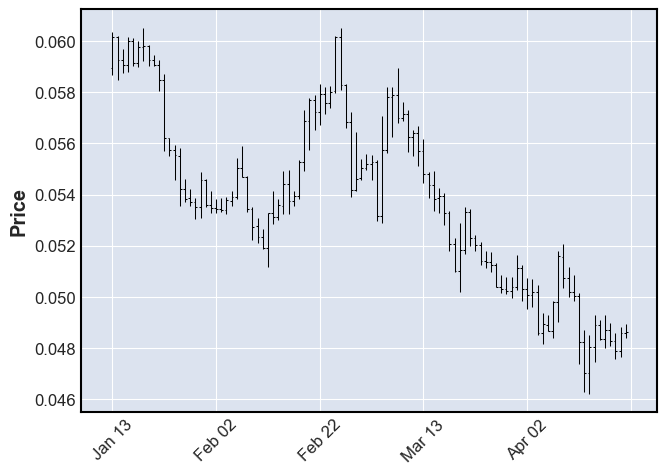

In [46]:
mpf.plot(Hist_df.set_index("Close time").tail(100))

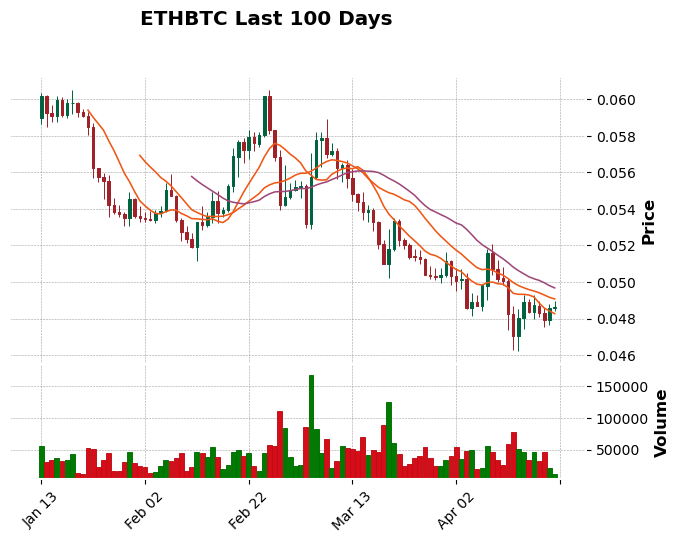

In [47]:
mpf.plot(Hist_df.set_index("Close time").tail(100),type="candle", style="charles", volume=True,title="ETHBTC Last 100 Days",
    mav=(10,20,30))

In [48]:
#Create a Forcast Model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [49]:
#Prepare Data using MinMax
Hist_df = Hist_df.set_index("Close time")
Hist_df.head()

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Close time,,,,,,,,,,,
2018-01-01 23:59:59.999000064,2018-01-01,0.053586,0.057200,0.053401,0.056367,312440.757,17404.158882,406017,150566.088,8389.503285,0.0
2018-01-02 23:59:59.999000064,2018-01-02,0.056368,0.066265,0.051040,0.058261,492006.759,30046.044490,656785,234144.312,14291.857492,0.0
2018-01-03 23:59:59.999000064,2018-01-03,0.058300,0.064210,0.056449,0.062600,469486.617,27812.696618,654095,217935.111,12922.279850,0.0
2018-01-04 23:59:59.999000064,2018-01-04,0.062600,0.070000,0.060125,0.062236,595991.613,38477.318894,872477,283608.904,18313.391411,0.0
2018-01-05 23:59:59.999000064,2018-01-05,0.062449,0.069758,0.054000,0.056584,710527.221,44244.990715,945045,345391.452,21479.255073,0.0


In [50]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Hist_df['Close'].values.reshape(-1,1))

In [51]:
#Prediction Day
prediction_days = 60 # Number of days the neural network will predict

In [52]:
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [53]:
#Create the Neural Network

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2)) # To prevent overfitting
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2)) # To prevent overfitting
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32)

c:\Users\Student\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - loss: 0.0269
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0042
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - loss: 0.0031
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0025
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0024
Epoch 6/50
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0025